# Анализ оттока клиентов банка «Метанпром»

## Материалы 

* Ссылка на дашборд: https://public.tableau.com/views/Dashbordbank/sheet2?:language=en-US&:display_count=n&:origin=viz_share_link

Задача - проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

Ход исследования:
1. Обзор данных 
2. Предобработка данных
3. Исследовательский анализ данных
4. Статистический анализ данных
5. Выводы и рекомендации

## Обзор данных

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy import stats as st

In [2]:
# прочтиаем файл 

#df = pd.read_csv('C:\\Users\\fob_v\\Projects\\Datasets\\bank_dataset.csv')

In [3]:
df = pd.read_csv('/datasets/bank_dataset.csv', sep=',')

In [4]:
# создадим функцию для получения информации о датасете 

df_list = [df]
for df in df_list:
    print('Первые 5 строк датасета')
    display(df.head(5))
    print('Общая информация о датасете')
    display(df.info())
    print('Количество дубликатов: {}'. format(df.duplicated().sum()))
    print('Количество пропусков')
    print(df.isna().sum())

Первые 5 строк датасета


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

Количество дубликатов: 0
Количество пропусков
userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64


Вывод: 
- в датасете 10 000 строк
- дубликатов нет
- типы данных верные
- пропуски присутствуют в столбце Balance с данными о балансе на счете клиента. Они могли возникнуть из-за технического сбоя или человеческого фактора, необходимо проверить, для каких категорий или признаков наиболее характерно наличие пропусков (возможно, определенный город). 


## Предобработка данных

In [5]:
# приведем названия столбцов к нижнему регистру 

df.columns = df.columns.str.lower()

In [6]:
# изменим название столбца user_id 

df = df.rename(columns={'userid':'user_id'})

In [7]:
# посчитаем количество клиентов банка в каждом городе

df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

Большая часть клиентов проживает в Ярославле. 

In [8]:
# посчитаем количество пропусков в данных по Ярославлю 

df[df['city'] == "Ярославль"].isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             2418
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [9]:
# посчитаем количество пропусков в данных по Ростову  

df[df['city'] == "Ростов Великий"].isna().sum()


user_id             0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
creditcard          0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

In [10]:
# посчитаем количество пропусков в данных по Рыбинску  

df[df['city'] == "Рыбинск"].isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             1199
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [11]:
# заменим пропуски на 0

#df['balance'] = df['balance'].fillna(0)

Вывод:
- привели названия столбцов к нижнему регистру
- посчитали количество пропусков. Пропущенные значения присутствуют в данных 2 городов: Ярославле и Рыбинске, большая часть в Ярославле - 2418 из 3617 пропусков. Причина их возникновения может иметь технический характер, или быть следствием человеческой ошибки. Поскольку пропуски составляют практически половину данных, заменим пропущенные значения на 0 на этапе исследовательского анализа и исключим их на этапе статистического анализа, чтобы выводы были корректными.


## Исследовательский анализ 

### Анализ данных на выбросы и аномалии

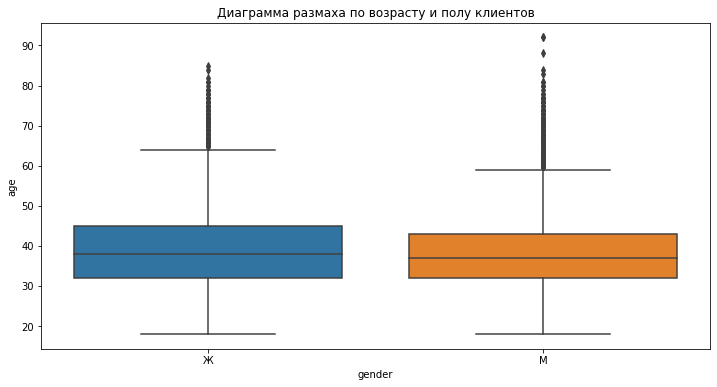

In [12]:
# посторим боксплот по возрасту и полу клиентов

plt.figure(
    figsize=(12, 6)
) 
sns.boxplot(x='gender', y='age', data=df)
plt.title('Диаграмма размаха по возрасту и полу клиентов')
plt.show()

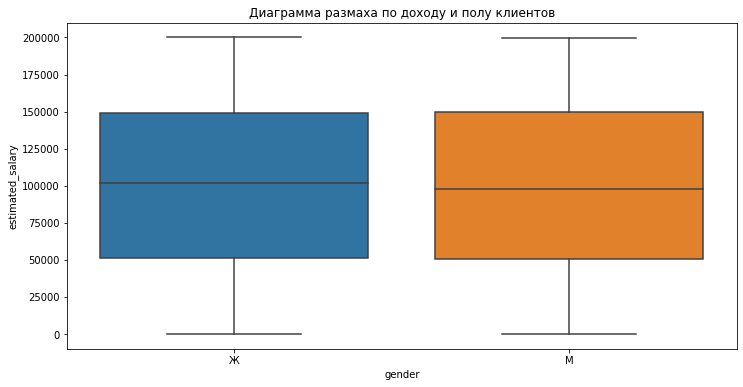

In [13]:
#посторим боксплот по доходу и полу клиентов

plt.figure(
    figsize=(12, 6)
) 
sns.boxplot(x='gender', y='estimated_salary', data=df)
plt.title('Диаграмма размаха по доходу и полу клиентов')
plt.show()

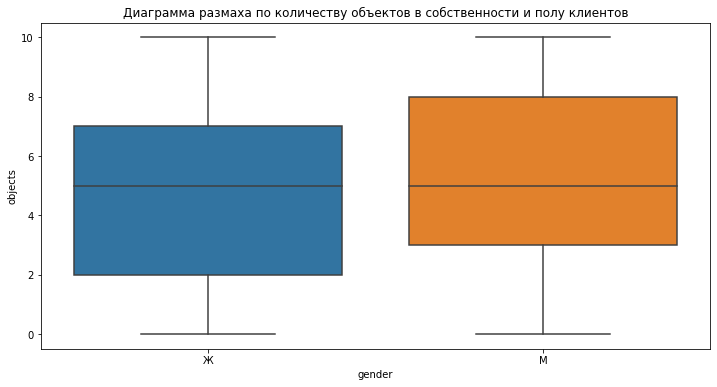

In [14]:
#посторим боксплот по количеству объектов в собственности и полу клиентов

plt.figure(
    figsize=(12, 6)
) 
sns.boxplot(x='gender', y='objects', data=df)
plt.title('Диаграмма размаха по количеству объектов в собственности и полу клиентов')
plt.show()

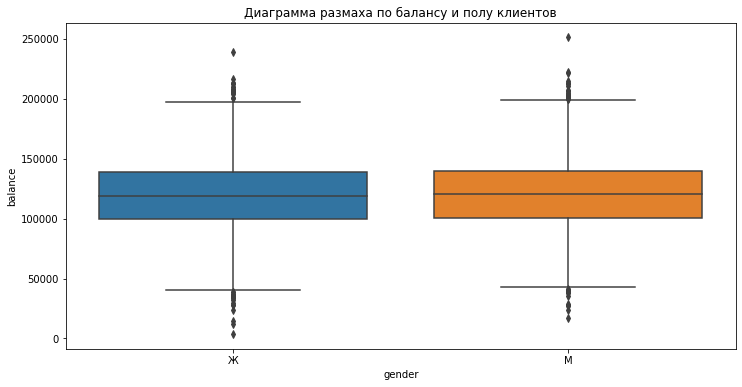

In [15]:
#посторим боксплот по балансу и полу клиентов

plt.figure(
    figsize=(12, 6)
) 
sns.boxplot(x='gender', y='balance', data=df)
plt.title('Диаграмма размаха по балансу и полу клиентов')
plt.show()

##### Вывод:
- большинством клиентов банка являются люди среднего  трудоспособного возраста 30-45 лет, встречаются также "выбросы" в виде людей пенсионного возраста старше 60 лет, самые возрастные клиенты - мужчины 92 лет.
- уровень дохода мужчин и женщин практически одинаков и составляет 50-150 тысяч рублей.
- мужчины-клиенты имеют больше объектов в собственности (3-8), женщины - 2-7.
- на счете клиентов находятся суммы от 100 до 150 тысяч, при этом и у женщин, и у мужчин встречаются "выбросы" в виде максимальных значений от 200 до 250 тысяч и минимальных от 0 до 50 тысяч.


### Категоризация данных


Проведем категоризацию данных по возрасту, уровню дохода, количеству объектов и балансу на счете клиентов.




In [16]:
# создадим функцию распределения возраста по категориям

def age_category(df):
    
    if df['age'] <= 30:
        return 'молодой'
    
    elif df['age'] <= 60:
        return 'средний возраст'
    
    else:
        return 'пенсионный возраст'

# добавим новый столбец в таблицу

df['age_category'] = df.apply(age_category, axis=1)

df.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,средний возраст
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний возраст
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний возраст
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,средний возраст
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,средний возраст


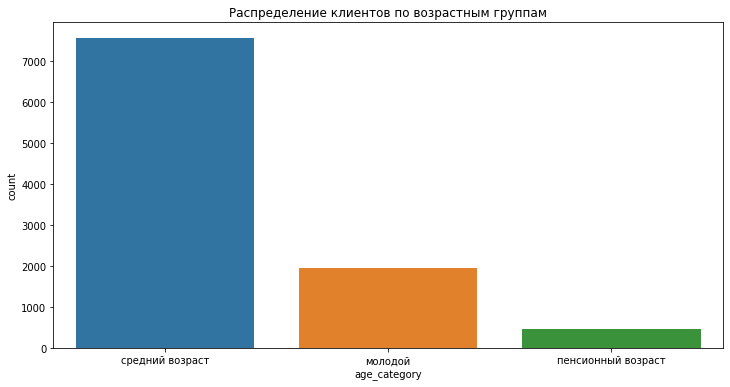

In [17]:
# построим график распределения клиентов по возрастным группам 

plt.figure(
    figsize=(12, 6)
) 
sns.countplot(x = 'age_category', data = df)
plt.title('Распределение клиентов по возрастным группам')
plt.show()

Распределим доход клиентов по квантилям диаграммы размаха:

- 1 квантиль от 0 до 50 тысяч будем считать низким доходом
- 2 квантиль от 50 до 100 тысяч - средним уровнем дохода
- 3 квантиль от 100 до 150 тысяч - высоким уровнем дохода

In [18]:
# создадим функцию распределения заработка по категориям

def salary_category(df):
    
    if df['estimated_salary'] <= 50000:
        return 'низкий достаток'
    
    elif df['estimated_salary'] <= 100000:
        return 'средний достаток'
    
    else:
        return 'высокий достаток'

# добавим новый столбец в таблицу

df['salary_category'] = df.apply(salary_category, axis=1)

df.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,salary_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,средний возраст,высокий достаток
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний возраст,высокий достаток
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний возраст,высокий достаток
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,средний возраст,средний достаток
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,средний возраст,средний достаток


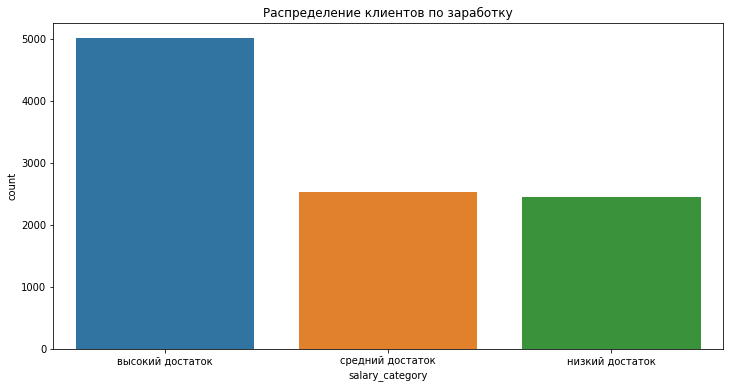

In [19]:
# построим график распределения клиентов по заработку

plt.figure(
    figsize=(12, 6)
) 
sns.countplot(x = 'salary_category', data = df)
plt.title('Распределение клиентов по заработку')
plt.show()

Распределим клиентов по количеству объектов по квантилям диаграммы размаха:
- 1 кавантиль - клиенты, к которых нет объектов в собственности
- 2 квантиль - клиенты с 1 объектом
- 3 квантиль - 2-5 объектов
- 4 квантиль - более 5 объектов


In [20]:
# создадим функцию распределения клиентов по количеству объектов 

def objects_category(df):
    
    if df['objects'] == 0:
        return 'нет объектов'
    
    elif df['objects'] < 2:
        return '1 объект'
    
    elif df['objects'] <= 5:
        return '2-5 объектов'
    
    else:
        return 'боле 5 объектов'

# добавим новый столбец в таблицу

df['objects_category'] = df.apply(objects_category, axis=1)

df.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,salary_category,objects_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,средний возраст,высокий достаток,2-5 объектов
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний возраст,высокий достаток,1 объект
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний возраст,высокий достаток,боле 5 объектов
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,средний возраст,средний достаток,1 объект
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,средний возраст,средний достаток,2-5 объектов


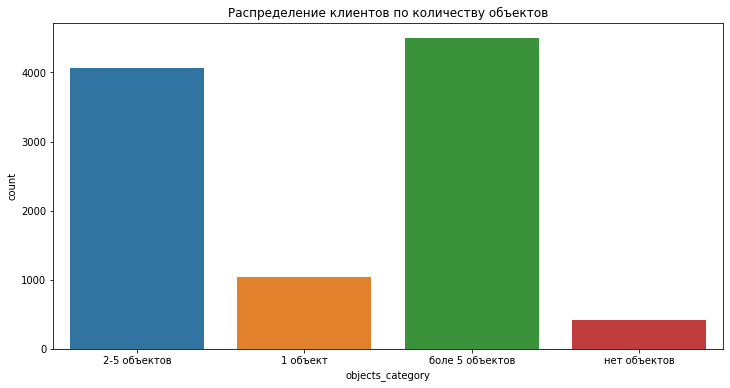

In [21]:
# построим график распределения клиентов по количеству объектов 

plt.figure(
    figsize=(12, 6)
) 
sns.countplot(x = 'objects_category', data = df)
plt.title('Распределение клиентов по количеству объектов')
plt.show()

Распределим баланс клиентов по квантилям диаграммы размаха:

- 1 кавантиль- клиенты, баланс у которых ниже 50 т.р.
- 2 квантиль - клиенты, баланс у которых в диапазоне 50-100 т.р.
- 3 квантиль - клиенты, баланс у которых в диапазоне 100-150 т.р.
- 4 квантиль - клиенты с балансом более 150 т.р.

In [22]:
# создадим функцию распределения баланса

def balance_category(df):
    
    if df['balance'] <= 50000:
        return '0 - 50000'
           
    elif df['balance'] <= 100000:
        return '50 000 - 100 000р'
    if df['balance'] <= 150000:
        return '100 000 - 150 000р'
    
    else:
        return 'более 150 000р'

#добавим новый столбец в таблицу

df['balance_category'] = df.apply(balance_category, axis=1)

df.head()

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,salary_category,objects_category,balance_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,средний возраст,высокий достаток,2-5 объектов,более 150 000р
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний возраст,высокий достаток,1 объект,50 000 - 100 000р
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний возраст,высокий достаток,боле 5 объектов,более 150 000р
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,средний возраст,средний достаток,1 объект,более 150 000р
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,средний возраст,средний достаток,2-5 объектов,100 000 - 150 000р


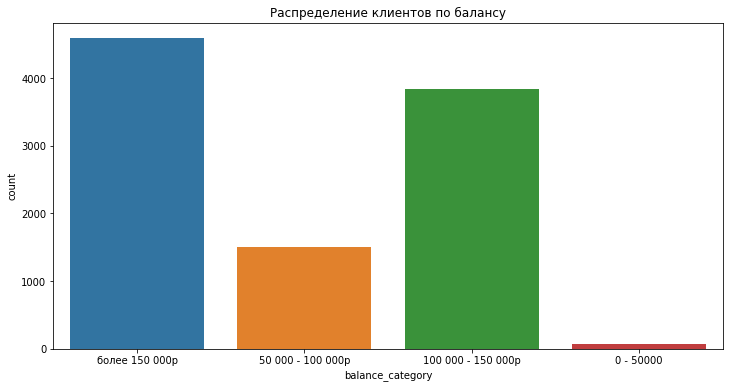

In [23]:
# построим график распределения клиентов по балансу 

plt.figure(
    figsize=(12, 6)
) 
sns.countplot(x = 'balance_category', data = df)
plt.title('Распределение клиентов по балансу')
plt.show()

Вывод:
- основная часть клиентов принадлежит средней возрастной группе 30-60 лет
- клиенты принадлежат к группе с высоким уровнем дохода (более 100 тысяч)
- в большинстве имеют в собственности более 5 объектов 
- у большей части клиентов на счете более 100 тысяч

### Средние значения и стандартные отклонения данных по всем клиентам

In [24]:
# заменим данные в столюце gender на 0 и 1, чтобы посмотреть распределения 

df['gender'] = df['gender'].replace({'Ж':0, 'М': 1})

In [25]:
# изучим средние значения и стандартные отклонения данных

df.describe()

,user_id,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.545700,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,1.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Перед нами данные о 10000 клиентах банка. 
- Средний балл кредитного скоринга - 650. 
- Среди клиентов приблизительно одинаковое количество мужчин и женщин. 
- Средний возраст клиента составляет 39 лет, самым молодым клиентам 18 лет, самым старшим - 92 года. 
- В среднем в собственности клиентов находится 5 объектов. 
- На счете клиентов в среднем находится около 120 т.р. 
- В среднем клиенты пользуются 1-2 продуктами банка, макисмальное количество используемых продуктов - 4. 
- 70% клиентов имеют кредитную карту, но только 50% пользуются ею.
- средняя зарплата клиентов - 100 тысяч рублей. При этом минимальная заработная плата - 11 рублей, вероятно, это данные клиентов, у которых нет официального заработка, или тех, кто находится в декретном отпуске. Максимальная сумма - практически 200 тысяч.
- Общий отток клиентов в среднем составляет 20%

### Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

Поскольку нам нужен усредненный портрет клиента банка с учетом выбросов, посчитаем средние значения признаков в двух группах. 

In [26]:
# изучим средние значения признаков у тех, кто ушел в отток и тех, кто остался 

df.groupby('churn').mean().T

churn,0,1
user_id,1.573390e+07,1.573279e+07
score,6.518532e+02,6.453515e+02
gender,5.725229e-01,4.408444e-01
age,3.740839e+01,4.483800e+01
objects,5.033279e+00,4.932744e+00
balance,1.195359e+05,1.207470e+05
products,1.544267e+00,1.475209e+00
creditcard,7.071455e-01,6.990673e-01
loyalty,5.545649e-01,3.608247e-01
estimated_salary,9.973839e+04,1.014657e+05


Показатели в двух группах практически одинаковы. Различия между ушедшими и оставшимися пользователями есть в следующих показателях:
- возраст: в отток попадают клиенты более старшего возраста (45 лет по сравнению с 37 годами оставшихся)
- заработк: выше у ушедших клиентов
- активность: в оттоке менее активные клиенты 


### Распределения признаков для тех, кто ушёл, и тех, кто остался 

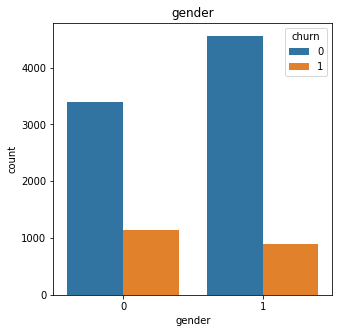

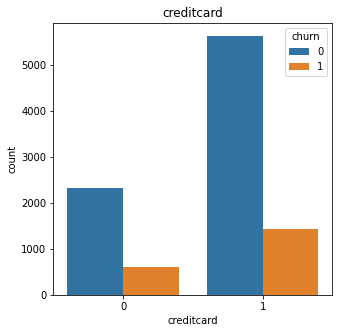

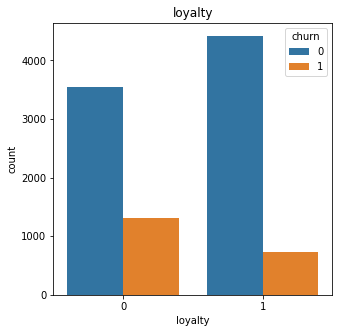

In [27]:
# построим графики для булевых значений

for column in ['gender', 'creditcard', 'loyalty']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    palette="pastel"
    plt.title(column)
    plt.show()

Чаще уходят в отток:
- женщины уходят немного чаще мужчин
- клиенты, у которых есть кредитная карта
- менее активные клиенты банка

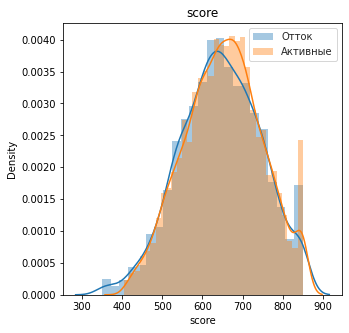

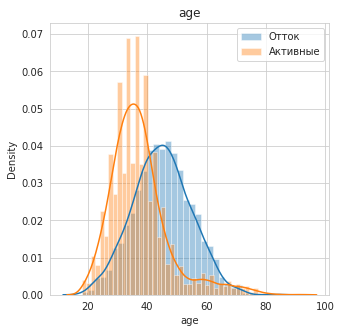

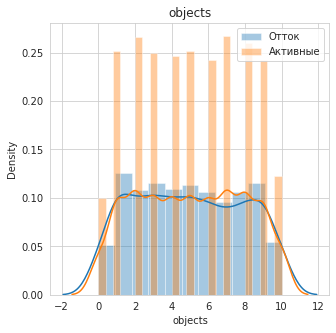

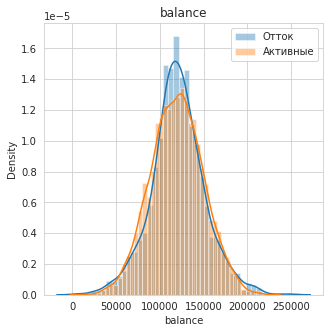

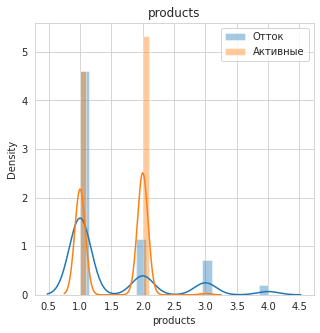

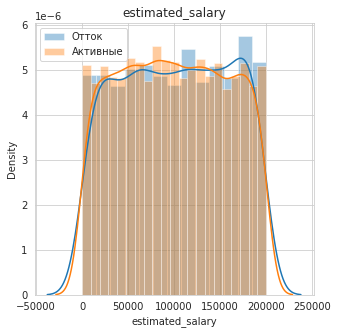

In [28]:
# построим графики для небинарных значений

for column in ['score', 'age', 'objects', 'balance', 'products', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]   
    sns.distplot(df.query('churn==1')[column], label = 'Отток',  hist=True, kde=True)
    sns.distplot(df.query('churn==0')[column], label = 'Активные',  hist=True, kde=True)
    sns.set_style('whitegrid')
    plt.legend()
    plt.title(column)
    plt.show()

Чаще уходят в отток:
- клиенты с уровнем кредитного скоринга 600 и более, при этом у оставшихся клиентов уровень скоринга такой же, поэтому этот показатель не является определяющим
- клиенты более старшего возраста 40-60 лет, клиенты в возрастее 30-40 лет чаще остаются с банком
- клиенты с высоким балансом на карте - 100-150 тысяч
- клиенты, которые пользуются 3-мя или 4-мя продуктами, - 100% отток, но таких клиентов мало. Наименьший отток среди клиентов, которые пользуются 2-мя продуктами
- уровень заработной платы не различается кардинально для обеих групп

In [29]:
# посчитаем количество ушедших клиентов в каждом городе

df[df['churn']==True].groupby('city').agg({'user_id': ['count']})

,user_id
,count
city,
Ростов Великий,814
Рыбинск,413
Ярославль,810


Больший отток клиентов в Ростове Великом и Ярославле.

### Матрица корреляции

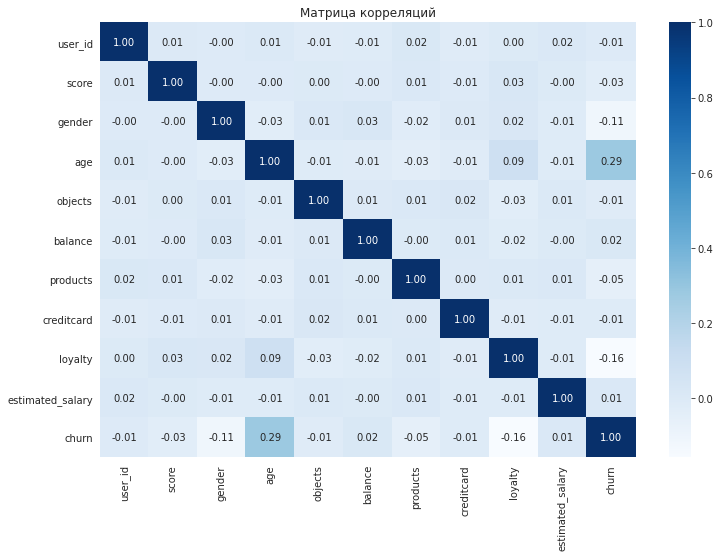

In [30]:
# построим матрицу корреляции 

cm=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={"size": 10}, cmap="Blues")
plt.title('Матрица корреляций', fontsize = 12)
plt.show()

Корреляция для большинства признаков практически отсутствует. В большинстве случаев она равна 0.01. Следовательно, большая часть характеристик не влияет на отток клиентов, а именно: заработная плата, наличие кредитной карты, количество объектов в собственности. Слабая корреляция у признаков: возраст, активность и пол, коррелируют баланс и количество продуктов, которыми пользуется клиент. Но в целом по матрице корреляции мы не можем определить явные признаки, свойственные клиентам, которые уходят в отток. 



Вывод
На основе проведенного исследовательского анализа мы можем сформировать портрет типичного клиента банка.

Это мужчины и женщины среднего трудоспособного возраста 30-50 лет с высоким (более 100 тысяч) уровнем дохода. Большая часть клиентов обладает более 3 объектами собственности, причем у мужчин этот показатель выше. На счете такого клиента находятся суммы от 100 до 150 тысяч. Они пользуются 1-2 продуктами банка, имеют кредитную карту и средний балл кредитного скоринга - 650.


Также мы можем сформировать портреты клиентов, ушедших в отток, и тех, кто остался с банком. 

Общий отток клиентов банка составляет 20%, чаще уходят из банка: 
- женщины
- клиенты в возрасте 40-60 лет,
- клиенты, у которых есть кредитная карта
- неактивные клиенты банка
- жители Ростова Великого и Ярославля.
- клиенты, которые пользуются 3-4 продуктами банка 
- киенты, на балансе карты которых находятся 100-150 тысяч

Остаются с банком:
- жители Рыбинска 
- мужчины
- клиенты в возрасте 30-40 лет
- клиенты, которые пользуются 2 продуктами банка
- активные клиенты банка


## Проверка гипотез

###  Гипотеза различия дохода между теми клиентами, которые ушли, и теми, которые остались

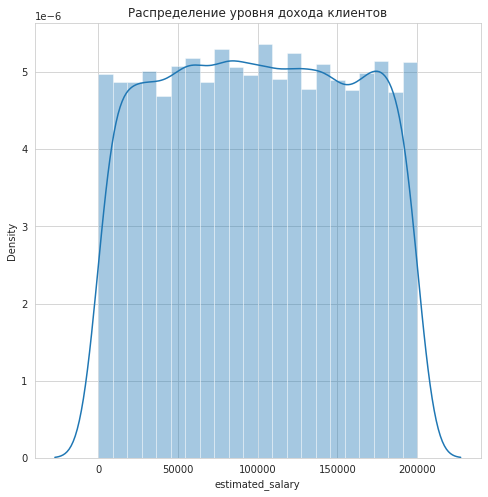

In [31]:
# создадим график распределения уровня дохода клиентов

plt.figure(figsize=(8, 8))
sns.distplot(df['estimated_salary'])
sns.set_style('whitegrid')
plt.title('Распределение уровня дохода клиентов')
plt.show()

Распределение напоминает нормальное, для проверки гипотезы можем использовать U-критерий (Манна-Уитни).

Формулируем гипотезы:
- H0: доход клиентов, которые ушли, равен доходу клиентов, которые остались
- H1: доход клиентов, которые ушли, отличается от дохода клиентов, которые остались

In [32]:
# задаем уровень статичстической значимости

alpha = 0.05

results = st.mannwhitneyu(df[df['churn']==1]['estimated_salary'], df[df['churn']==0]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.22705150930153783
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [33]:
# посчитаем медианный уровень заработка у ушедших клиентов

df[df['churn']==1]['estimated_salary'].median().round()

102461.0

In [34]:
# посчитаем медианный уровень заработка у оставшихся клиентов

df[df['churn']==0]['estimated_salary'].median().round()

99645.0

Уровень дохода между теми клиентами, которые ушли, и теми, которые остались, отличается незначительно. Статистически значимой разницы между данными не обнаружено, мы не можем опровергуть нулевую гипотезу о равенстве доходов между группами.

### Гипотеза различия в возрасте между теми клиентами, которые ушли, и теми, которые остались

График распределения количества активных и ушедших клиентов по возрастам показал, что между этими группами есть различия. Поэтому проверим гипотезу о разнице в возрасте между теми клиентами, которые ушли, и теми, которые остались.

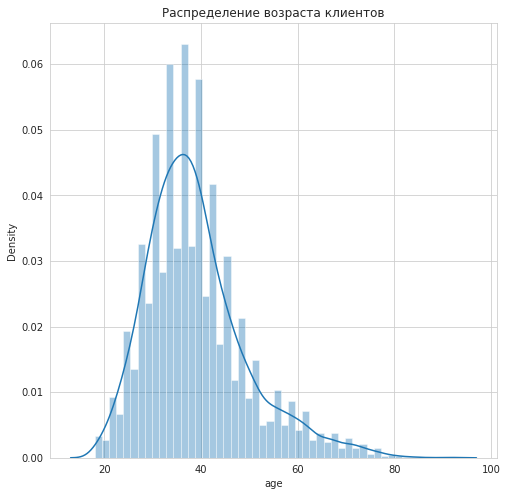

In [35]:
# создадим график распределения возраста клиентов

plt.figure(figsize=(8, 8))
sns.distplot(df['age'])
sns.set_style('whitegrid')
plt.title('Распределение возраста клиентов')
plt.show()

Распределение напоминает нормальное с небольшим отклонением вправо - в сторону сильно возрастных клиентов. Для проверки гипотезы можем использовать U-критерий (Манна-Уитни).

Формулируем гипотезы:

- H0: возраст клиентов, которые ушли, равен возрасту клиентов, которые остались
- H1: возраст клиентов, которые ушли, отличается от возраста клиентов, которые остались

In [36]:
# задаем уровень статичстической значимости

alpha = 0.05

results = st.mannwhitneyu(df[df['churn']==1]['age'], df[df['churn']==0]['age'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  3.2104014319371675e-230
Отвергаем H0: разница статистически значима


In [37]:
# посчитаем медианный возраст ушедших клиентов

df[df['churn']==1]['age'].median().round()

45.0

In [38]:
# посчитаем медианный возраст оставшихся клиентов

df[df['churn']==0]['age'].median().round()

36.0

Медианный возраст ушедших клиентов 45 лет, медианный возраст оставшихся клиентов 36 лет. Между данными присутствует статистически значимая разница, мы не можем принять нулевую гипотезу.

 ## Вывод и рекомендации

Мы проанализировали данные 10 тысяч клиентов банка из трех городов и составили общий портрет клиента, для которого характерны следующие признаки:
- мужчины и женщины
- возраст 30-60 лет
- высокий (более 100 тысяч) уровнь дохода
- более 3 объектов собственности
- от 100 до 150 тысяч на банковском счете 
- 1-2 продукта банка в использовании 
- есть кредитная карта 
- средний балл кредитного скоринга - 650

Также выяснили, что 20% клиентов перестают пользоваться услугами банка. Для пользователей, уходящих в отток, характерны: 

- женский пол
- возраст 40-60 лет
- наличие кредитной карты
- пользование 1, 3 или 4-мя продуктами банка. Среди тех клиентов, которые используют 4 продукта, 100% отток
- высокий доход
- город проживания - Ростов Великий и Ярославль

80% остаются лояльными банку, для этих клиентов характерны:

- мужской пол
- возраст 30-40 лет
- пользование 2 продуктами банка 
- город проживания - Рыбинск

Мы проверили две статистические гипотезы. Первая гипотеза о различии дохода между теми клиентами, которые ушли, и теми, которые остались, была подтверждена. Действительно медианный заработок ушедших и оставшихся в банке клиентов практически совпадает. Вторая гипотеза о различии в возрасте между теми клиентами, которые ушли, и теми, которые остались, была опровергнута. Медианный возраст ушедших и оставшихся клиентов различается на 9 лет. 

На основе проведенного исследовательского и статистического анализа можем предположить, что главной мерой по удержанию клиентов должна стать новая линейка предложений для людей пенсионного возраста, потому что в отток чаще всего попадают именно они. Также стоит разобраться, почему у тех клиентов, которые используют 4 продукта, 100% отток. Поскольку наиболее лояльными являются клиенты, которые используют 2 продукта, вероятно стоит разработать парные банковские программы, чтобы привлечь больше клиентов пользоваться двумя продуктами. 
